# Customer Analytics Study Using Segmentation & Principal Component

## SCENARIO

>**In this task, a market segmentation will be performed on a transactional dataset of a national convenience store chain, 4 files have been provided describing consumer behavior of 3000 customers over a span of 6 months**

At first, we will load all the 4 files to analyse the data and choose the best file suitable which will be covering maximum requirements- mentioned by the company's Chief Data Officer

### Step.1: Data file Exploration and Selection 

In [1]:
# loading the baskets_sample file using pandas
import pandas

baskets = pandas.read_csv("baskets_sample.csv")

#-- examine the first 10 lines of the data here
baskets.head(10)

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1
5,6177,2007-03-01 07:37:00,11,£12.54,9
6,5467,2007-03-01 07:39:00,2,£1.70,2
7,263,2007-03-01 07:48:00,3,£1.84,2
8,4745,2007-03-01 07:55:00,4,£2.41,2
9,10613,2007-03-01 08:01:00,7,£6.08,4


In [2]:
# loading the category_spends_sample file using pandas
import pandas

category = pandas.read_csv("category_spends_sample.csv")

#-- examine the first 10 lines of the data here
category.head(10)

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,£64.58,£35.91,£107.78,£27.08,£29.59,£0.00,£54.83,£6.35,£22.83,...,£28.62,£162.10,£28.02,£28.12,£28.54,£2.00,£15.00,£7.48,£0.00,£0.84
1,8171,£16.89,£37.24,£28.84,£33.43,£66.40,£0.00,£22.06,£12.09,£2.34,...,£26.44,£0.00,£8.42,£2.65,£3.76,£0.00,£0.00,£9.99,£0.00,£0.00
2,1060,£87.30,£82.98,£49.88,£20.57,£37.04,£0.00,£9.85,£57.98,£31.12,...,£54.65,£0.00,£0.00,£2.60,£0.00,£18.00,£20.00,£106.46,£0.00,£0.00
3,3728,£84.05,£186.56,£175.50,£119.84,£111.08,£0.00,£13.05,£25.54,£124.42,...,£0.95,£127.70,£0.00,£0.00,£0.00,£4.00,£0.00,£0.00,£0.00,£4.50
4,14621,£35.16,£121.31,£79.23,£29.03,£37.17,£0.00,£40.06,£0.00,£4.68,...,£36.24,£0.00,£2.55,£99.16,£0.00,£0.00,£0.00,£3.40,£0.00,£0.00
5,12563,£25.76,£19.11,£20.84,£37.29,£8.99,£0.00,£0.00,£17.65,£14.48,...,£17.32,£0.00,£36.74,£5.50,£3.73,£0.00,£0.00,£0.00,£11.28,£0.00
6,1652,£97.60,£31.16,£21.50,£47.13,£26.29,£0.00,£4.12,£24.92,£1.26,...,£31.96,£0.00,£0.00,£0.00,£9.83,£0.00,£0.00,£0.00,£0.00,£0.00
7,2989,£52.82,£51.56,£51.92,£63.79,£61.78,£0.00,£15.35,£24.52,£22.16,...,£47.08,£0.00,£0.00,£10.46,£19.10,£0.00,£20.00,£1.70,£0.00,£5.08
8,14219,£126.27,£132.41,£35.54,£84.98,£23.47,£0.00,£0.00,£9.99,£9.63,...,£14.60,£0.00,£0.00,£0.89,£4.56,£0.00,£0.00,£0.00,£0.00,£0.00
9,1831,£2.77,£16.40,£47.54,£16.86,£5.42,£0.00,£9.42,£5.43,£1.57,...,£4.52,£0.00,£2.97,£0.55,£0.00,£9.00,£44.00,£0.00,£0.00,£0.00


In [3]:
# loading the lineitems_sample file using pandas
import pandas

lineitems_sample = pandas.read_csv("lineitems_sample.csv")

#-- examine the first 10 lines of the data here
lineitems_sample.head(10)

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50
3,2649,2007-03-12 16:05:00,34890,BAKERY,1,£0.57
4,859,2007-03-10 09:53:00,613984,BAKERY,1,£1.59
5,9269,2007-03-27 12:52:00,700756,PREPARED_MEALS,1,£2.00
6,6798,2007-03-14 20:27:00,663033,PREPARED_MEALS,2,£3.00
7,10248,2007-03-30 15:21:00,731976,FROZEN,1,£1.50
8,10222,2007-03-16 12:24:00,48565,FROZEN,1,£1.99
9,7401,2007-03-20 19:44:00,131436,SEASONAL_GIFTING,1,£1.69


In [4]:
# loading the customers_sample file using pandas
import pandas

customers = pandas.read_csv("customers_sample.csv")

#-- examine the first 10 lines of the data here
customers.head(10)

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,4749,220,260,1.181818,£631.12,£2.87
1,4757,248,333,1.342742,£452.42,£1.82
2,144,226,303,1.340708,£261.16,£1.16
3,572,285,346,1.214035,£638.79,£2.24
4,669,285,324,1.136842,£561.42,£1.97
5,792,830,857,1.032530,"£1,267.05",£1.53
6,928,276,294,1.065217,"£1,074.51",£3.89
7,1031,60,69,1.150000,£84.46,£1.41
8,1079,1040,1273,1.224038,"£1,730.24",£1.66
9,1325,191,214,1.120419,£441.80,£2.31


> **A summary of the 4 files provided:**
* **baskets_sample.csv**- number of datapoints: 195547, features: 5
* **customers_sample.csv**- number of datapoints: 3000, features: 6
* **category_spends_sample.csv**- number of datapoints: 3000, features: 21
* **lineitems_sample.csv**- number of datapoints: 1461315, features: 6

>**After visualization of all the files, we decided to work with "baskets_sample.csv" file because using this file the segmentation can be performed according to the requirements of the company**

### Step.2: Data Pre-processing (baskets_sample.csv)

In [5]:
# checking for missing value
baskets.isnull().sum()

customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64

In [6]:
# checking the type of data
baskets.dtypes

customer_number       int64
purchase_time        object
basket_quantity       int64
basket_spend         object
basket_categories     int64
dtype: object

In [7]:
#checking the number of datapoints
print('Numer of Datapoint {0:} & Number of Features {1:} '.format(baskets.shape[0], baskets.shape[1]))

Numer of Datapoint 195547 & Number of Features 5 


In [8]:
# converting the type of all the features to float
baskets["basket_spend"] = baskets["basket_spend"].replace('[\£,]', '', regex=True).astype(float)
baskets.dtypes

customer_number        int64
purchase_time         object
basket_quantity        int64
basket_spend         float64
basket_categories      int64
dtype: object

In [9]:
# new feature additon
baskets['average_spend']=baskets['basket_spend']

In [10]:
# the features are grouped
baskets=baskets.groupby('customer_number').agg({'purchase_time':lambda x:len(x),'basket_spend':lambda x: x.sum(),'average_spend':lambda x: x.mean(),'basket_quantity':lambda x:x.mean()})
baskets.head()

,purchase_time,basket_spend,average_spend,basket_quantity
customer_number,,,,
14,56,675.72,12.066429,9.482143
45,33,585.73,17.749394,19.848485
52,59,222.18,3.765763,4.983051
61,37,547.87,14.807297,13.486486
63,48,293.34,6.111250,5.854167


In [11]:
# features are renamed
baskets.rename(columns={'purchase_time':'Frequency','basket_spend':'Total_spend','average_spend':'Average_spend','basket_quantity':'Average_quantity'},inplace=True)
baskets.head()

,Frequency,Total_spend,Average_spend,Average_quantity
customer_number,,,,
14,56,675.72,12.066429,9.482143
45,33,585.73,17.749394,19.848485
52,59,222.18,3.765763,4.983051
61,37,547.87,14.807297,13.486486
63,48,293.34,6.111250,5.854167


In [12]:
#checking the number of datapoints
print('Numer of Datapoint {0:} & Number of Features {1:} '.format(baskets.shape[0], baskets.shape[1]))

Numer of Datapoint 3000 & Number of Features 4 


<AxesSubplot:xlabel='Total_spend', ylabel='Count'>

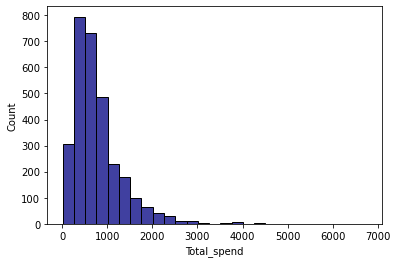

In [13]:
import seaborn as sns
sns.histplot(data = baskets, x = "Total_spend", color='navy', binwidth=250)

In [14]:
baskets.describe()

,Frequency,Total_spend,Average_spend,Average_quantity
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,65.182333,769.412937,14.801139,11.273373
std,47.464717,552.769022,11.161440,8.538046
min,1.000000,7.280000,1.456000,1.200000
25%,32.000000,406.120000,8.036819,6.114316
50%,53.000000,627.170000,11.770923,8.732520
75%,86.000000,957.675000,17.436190,13.388537
max,374.000000,6588.650000,152.621667,90.750000


### Step.3: Scatter Matrix plotting

>**To get a better understanding of how the features relate to each other, a scatter matrix of each of the 4 features present in the data is visualized**

In [15]:
# ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

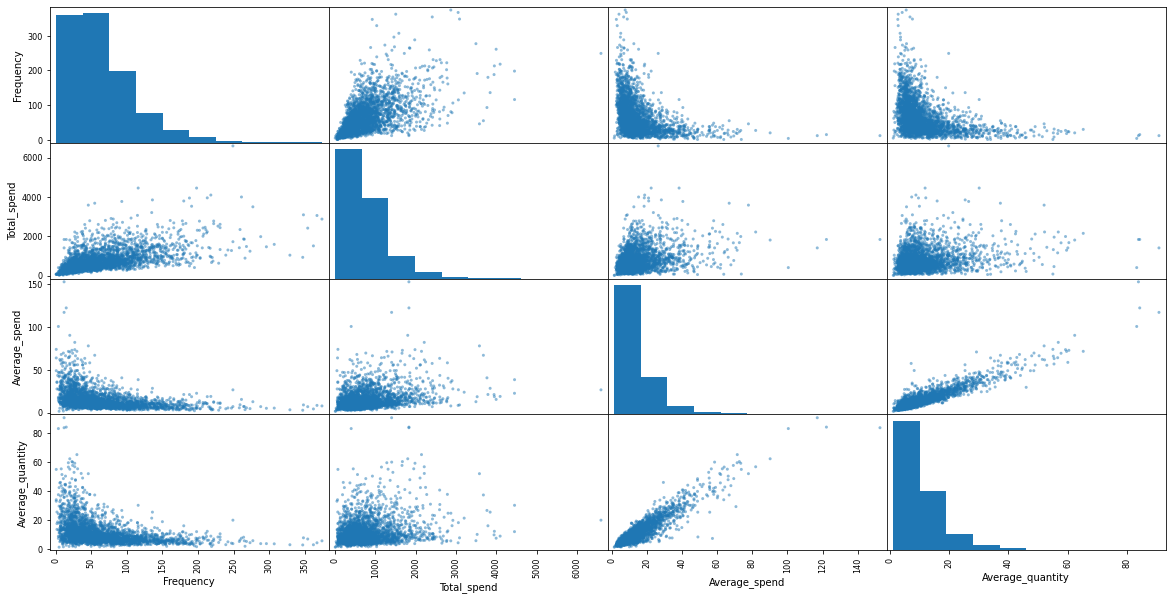

In [16]:
#-- Get a sense of them visually
%matplotlib inline
import matplotlib.pyplot as plt

#-- Produce a scatter matrix for each pair of features in the data
scatter = pandas.plotting.scatter_matrix(baskets, figsize = (20,10))

### Step.4: Analyzing the relationship among the features using Correlation 

>The correlation among the features of the dataset are examined using the corr() function that pandas provide to find the Pearson correlations among the features

In [17]:
#-- Create and print a cross correlation of all the variables against each other
corr = baskets.corr()
print(corr)

                  Frequency  Total_spend  Average_spend  Average_quantity
Frequency          1.000000     0.566806      -0.368883         -0.372982
Total_spend        0.566806     1.000000       0.315242          0.228917
Average_spend     -0.368883     0.315242       1.000000          0.915067
Average_quantity  -0.372982     0.228917       0.915067          1.000000


>Getting the visualization of the correlations using the heatmap function from the seaborn library

Text(0.5, 68.09375, 'Customer features correlations')

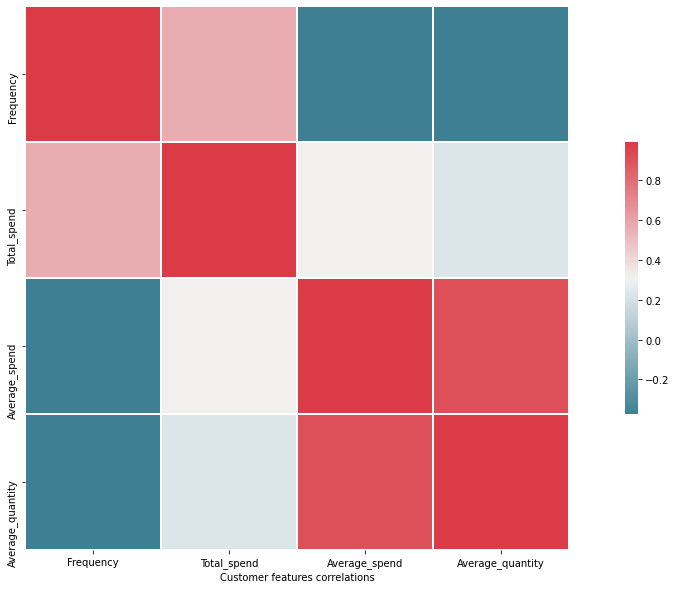

In [18]:
# heatmap visualization
import seaborn as sns 

#-- Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,10))

#-- Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xlabel('Customer features correlations')

In [19]:
# the correlation among the features are presented 
baskets.corr(method='pearson')

,Frequency,Total_spend,Average_spend,Average_quantity
Frequency,1.000000,0.566806,-0.368883,-0.372982
Total_spend,0.566806,1.000000,0.315242,0.228917
Average_spend,-0.368883,0.315242,1.000000,0.915067
Average_quantity,-0.372982,0.228917,0.915067,1.000000


>**Standardization of dataset**

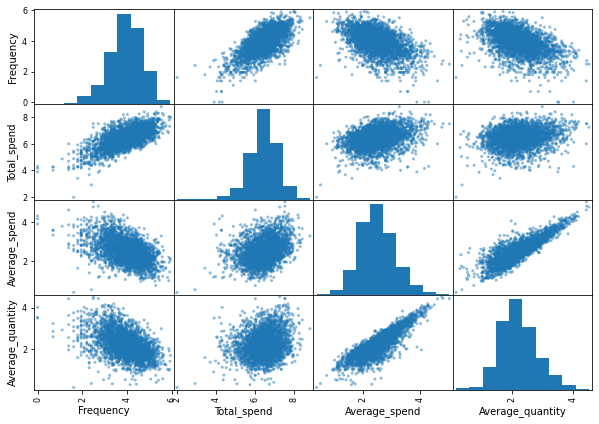

In [20]:
# plotting of graphs
import numpy as np

# Scale the data using the natural logarithm
logged_data = np.log(baskets)

#-- Produce a scatter matrix using the logged data...
scatter = pandas.plotting.scatter_matrix(logged_data, figsize = (10,7))

### Step.5: Feature Engineering

>**In this section, Principal Component Analysis (PCA) is performed to reduce the correlation among the features, PCA is used to eliminate the features with high correlations in the data**

In [21]:
# importing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit_transform(logged_data)

array([[-1.08398989e-01, -9.62230287e-02, -3.02745900e-02,
         7.60732731e-17],
       [ 7.86588141e-01, -4.39597554e-01, -3.05656196e-01,
         1.07696101e-14],
       [-4.67597023e-01,  1.56332628e+00, -3.86246016e-01,
        -2.48342918e-16],
       ...,
       [-3.22480740e-01,  9.03801196e-01, -1.35418913e-01,
        -3.68570635e-16],
       [ 6.62017435e-01,  1.08513468e-01,  1.32720964e-01,
        -2.15484511e-19],
       [ 1.33504797e+00,  2.53987345e-01,  1.47983196e-01,
         2.51710991e-16]])

>Explained Variance ratio of each features is also explained using PCA, how much variance within the data is explained by that feature alone

In [22]:
# PCA variance explained
pca.explained_variance_ratio_

array([5.49864747e-01, 4.16541098e-01, 3.35941550e-02, 5.06366852e-32])

In [23]:
# this specifies how many components to consider
import numpy as np
from numpy.ma.core import cumsum
pca = PCA()
pca.fit(logged_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1
n_components = d
print(n_components)

2


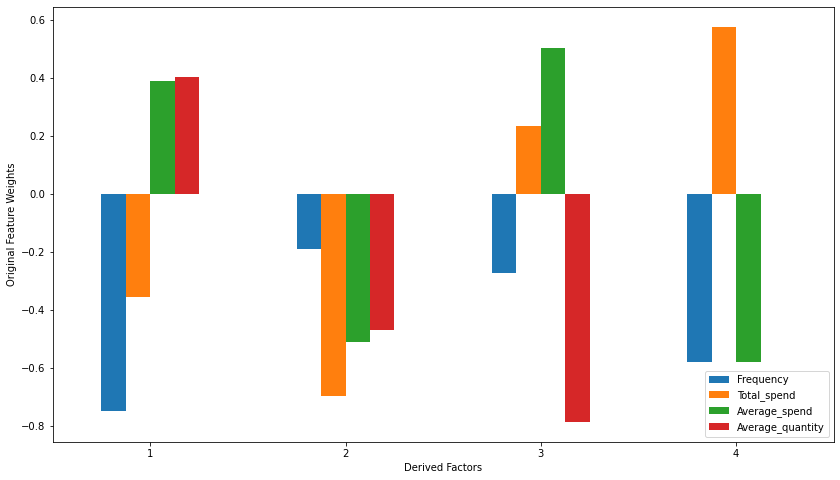

In [24]:
# The PCA is visualized using graph
def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pandas.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (14,8))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights")
   ax.set_xlabel("Derived Factors")
   ax.set_xticklabels(dimensions, rotation=0)

display_factors(pca, logged_data.columns)

>Explanation
 * **54.98% of the variance in the data is explained by the first principal component**
 * **41.65% of the variance in the data is explained by the second principal component**
 * **Since 96.63% of the variance in the data is explained by the first and second principal components, we can consider PC1 and PC2**

>**The first Principal Component (PC1):** **Frequency** is associated with large increase whereas, **Average_spend** and **Average_quantity** are decreasing

>**The second Principal Component (PC2):** **Total_spend**, **Average_spend** and **Average_quantity** are associated with large increase comapred to **Frequency**

>All the 4 components are covered using PC1 and PC2, hence we will be using PC1 and PC2 for analysis

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

#-- Generate a PCA factorization of your data
pca = PCA(n_components=2)
pca.fit(logged_data)

#-- print out the extent to which each original category/feature contributes to 
#-- each of the 3 newly derived factors/topics
print(logged_data.columns)
print(pca.components_)

Index(['Frequency', 'Total_spend', 'Average_spend', 'Average_quantity'], dtype='object')
[[-0.74667634 -0.35535256  0.39132378  0.4038127 ]
 [-0.18838059 -0.69710384 -0.50872325 -0.46878529]]


>**Selecting our Final features**

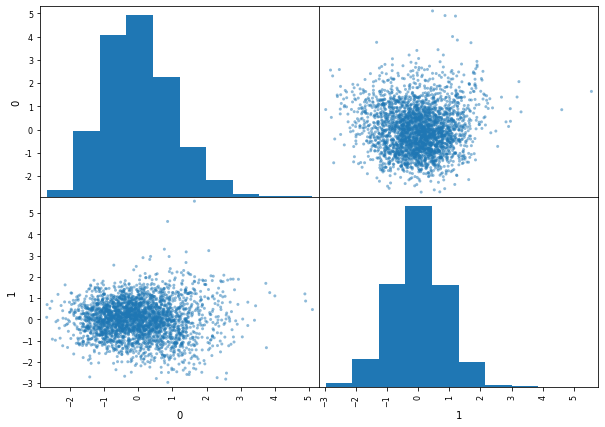

In [26]:
# selecting the final features
pca = PCA(n_components=2)
pca.fit(logged_data)

# TO DO: Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pandas.DataFrame(reduced_data)
scatter = pandas.plotting.scatter_matrix(reduced_data, figsize = (10,7))

### Step.6: Clustering

>In this section, finally the segments are created. K-means clustering algorithm is used to identify the various segments hidden in the data. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides a simple scoring method of a given clustering.

>**Finding the right number of segments**

In [27]:
# finding the righr number of segments
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_cluster = list(range(2,11))
print(range_n_cluster)

# Loop through different k solutions and assess the silhouette socore 
for n in range_n_cluster:
  clusterer = KMeans(n_clusters=n).fit(reduced_data)
  preds = clusterer.predict(reduced_data)
  centers = clusterer.cluster_centers_
  score = silhouette_score(reduced_data, preds, metric='euclidean')
  print("For n_clusters = {}. The average silhouette_score is : {})".format(n, score))
  warnings.filterwarnings("ignore", category=DeprecationWarning)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.35072555079231704)
For n_clusters = 3. The average silhouette_score is : 0.34968025929024543)
For n_clusters = 4. The average silhouette_score is : 0.3263764136783348)
For n_clusters = 5. The average silhouette_score is : 0.3199417842896215)
For n_clusters = 6. The average silhouette_score is : 0.32757934947142103)
For n_clusters = 7. The average silhouette_score is : 0.32397729155495236)
For n_clusters = 8. The average silhouette_score is : 0.32445129086846897)
For n_clusters = 9. The average silhouette_score is : 0.3269744935714999)
For n_clusters = 10. The average silhouette_score is : 0.3162231958941312)


>**Cluster Visualization**

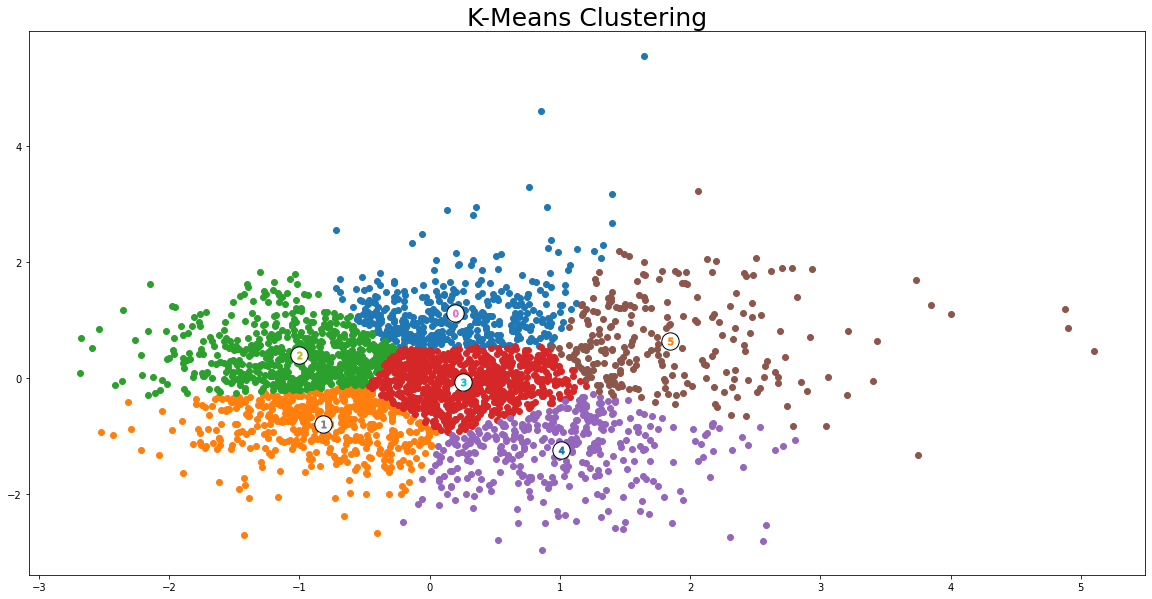

In [28]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=6).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pandas.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pandas.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)
plt.title('K-Means Clustering',fontsize=25)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [35]:
# TO DO: Inverse transform the centres
log_centres = pca.inverse_transform(centres)

# TO DO: Exponentiate the centres
true_centres = np.exp(log_centres)

#-- Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = logged_data.columns)
true_centres.index = segments
print(true_centres)

           Frequency  Total_spend  Average_spend  Average_quantity
Segment 0       35.0        262.0            7.0               6.0
Segment 1      108.0       1428.0           13.0              10.0
Segment 2       99.0        661.0            7.0               5.0
Segment 3       42.0        586.0           14.0              11.0
Segment 4       30.0       1013.0           34.0              25.0
Segment 5       11.0        204.0           18.0              14.0


### Step.7: Creating Profiles

In [30]:
#-- Join the segment assignments to the original data 
final_assigments = pandas.concat([assignments, baskets], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):  
    print("Segment", c+1)
    display(d.describe())

Segment 1.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,427.0,95.000000,95.000000,95.000000,95.000000
mean,0.0,54.315789,614.073158,15.046257,12.439080
std,0.0,41.416736,352.725120,11.657076,9.448885
min,0.0,1.000000,73.750000,3.580566,3.821429
25%,0.0,27.000000,348.735000,7.917213,6.376689
50%,0.0,42.000000,547.990000,13.150000,9.300000
75%,0.0,66.000000,759.620000,16.630423,14.340000
max,0.0,218.000000,2119.470000,73.750000,55.000000


Segment 2.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,511.0,92.000000,92.000000,92.000000,92.000000
mean,1.0,64.815217,805.097717,16.448881,13.079227
std,0.0,44.067114,515.928181,12.745104,9.653368
min,1.0,5.000000,69.470000,2.070718,2.138462
25%,1.0,31.000000,439.520000,7.861210,6.555660
50%,1.0,54.000000,712.905000,10.850104,9.482712
75%,1.0,83.250000,987.842500,20.825923,17.702922
max,1.0,207.000000,2425.460000,59.061579,44.714286


Segment 3.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,672.0,126.000000,126.000000,126.000000,126.000000
mean,2.0,57.500000,628.378492,14.278992,12.141370
std,0.0,39.978944,365.980997,11.683884,9.593648
min,2.0,4.000000,47.480000,2.729956,2.533333
25%,2.0,29.250000,404.500000,7.501384,6.782590
50%,2.0,49.500000,578.445000,11.730225,10.027254
75%,2.0,75.000000,813.590000,16.530556,13.897321
max,2.0,229.000000,2785.030000,100.482500,83.250000


Segment 4.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,788.0,150.000000,150.000000,150.000000,150.000000
mean,3.0,57.446667,686.290933,15.539594,12.728822
std,0.0,40.192246,410.846730,11.838611,9.169838
min,3.0,6.000000,81.760000,2.991156,3.065217
25%,3.0,29.250000,381.902500,8.822402,7.671053
50%,3.0,48.000000,584.920000,12.463242,9.828265
75%,3.0,77.500000,868.320000,17.465227,14.496212
max,3.0,258.000000,1996.510000,71.359444,59.611111


Segment 5.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,356.0,62.000000,62.000000,62.000000,62.000000
mean,4.0,59.387097,676.115645,13.774752,11.377737
std,0.0,32.540192,429.499532,14.925812,11.596040
min,4.0,6.000000,177.620000,2.999901,3.920792
25%,4.0,39.000000,349.847500,7.636197,6.510537
50%,4.0,50.000000,522.700000,10.563815,8.880233
75%,4.0,69.750000,821.417500,15.815488,12.631284
max,4.0,172.000000,2098.240000,116.948333,90.750000


Segment 6.0


,Cluster,Frequency,Total_spend,Average_spend,Average_quantity
count,246.0,43.000000,43.000000,43.000000,43.000000
mean,5.0,54.186047,761.987907,17.676439,14.257162
std,0.0,34.041470,538.464265,19.588071,13.396716
min,5.0,13.000000,176.930000,5.138364,4.186916
25%,5.0,32.000000,401.115000,9.075785,7.786458
50%,5.0,48.000000,540.350000,11.737500,10.370370
75%,5.0,60.500000,1038.000000,17.713581,15.530172
max,5.0,166.000000,2177.420000,122.163333,84.266667


In [31]:
baskets['Cluster']= preds
baskets.head()

,Frequency,Total_spend,Average_spend,Average_quantity,Cluster
customer_number,,,,,
14,56,675.72,12.066429,9.482143,3
45,33,585.73,17.749394,19.848485,3
52,59,222.18,3.765763,4.983051,0
61,37,547.87,14.807297,13.486486,3
63,48,293.34,6.111250,5.854167,0


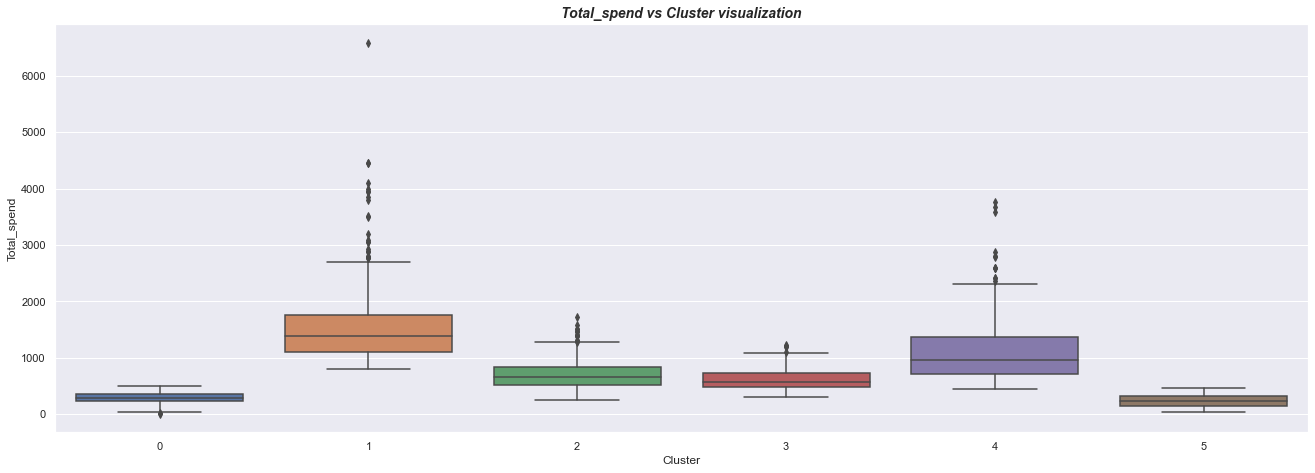

In [38]:
plt.rcParams['figure.figsize'] = (20.0, 7.0)

sns.set()

sns.boxplot(x = "Cluster", y = 'Total_spend', data=baskets)

plt.style.use('fivethirtyeight')

plt.title("Total_spend vs Cluster visualization", fontsize=14, fontstyle='italic', fontweight='bold')

plt.xticks()

plt.show()

In [47]:
final_baskets = baskets.filter(['customer_number','Cluster'], axis=1)
final_baskets

,Cluster
customer_number,
14,3
45,3
52,0
61,3
63,0
...,...
16295,3
16301,0
16303,0


> **CSV File Creation**

In [49]:
final_baskets.to_csv("D:/ASA_BASKET/final_baskets.csv")